# Multiresolution Blending and Feathering
in this question we want to use laplacian stack method in order to blend two images 
to do so, we have to follow some essential steps:

1) first, we pass two images from Gaussian filters ,each time with bigger sigma 

2) make laplacian of images of level n by subtracting the Gaussian stack of level n+1 from Gaussian stack of level n 

3) set the laplacian stack of highest level(l) to the Gaussian stack  of level(l+1) 

4) Add the laplacian stack of images in each level to reach the blend image

### brief explanation
our objective is to implement Gaussian and Laplacian stacks, which are quite similar to the pyramids implemented , but instead of downsampling, the same image is convolved with a Gaussian filter of increasing sigma at each level (in this sample, we double sigma (the standard deviation) at each level. Consequently, the image becomes coarser at every level of the Gaussian stack, but the size of the image is preserved. Each level of the Laplacian stack was generated by taking the difference between the image from the Gaussian stack of the same level and the image from the Gaussian stack of the next level. The Laplacian stack essentially respresents the frequencies between each level of the Gaussian stack. below you can see codes and result of implemntation of guassin filters and it's result(guassian stack)

### original images 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

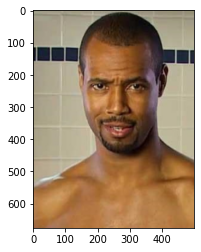

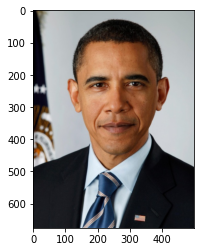

In [3]:
source1 = cv2.imread('res08_5.jpg')
source1 = cv2.cvtColor(source1, cv2.COLOR_BGR2RGB)
source1 = np.array(source1)


source2 = cv2.imread('res09_5.jpg')
source2 = cv2.cvtColor(source2, cv2.COLOR_BGR2RGB)
source2 = np.array(source2)

plt.figure(1)
plt.imshow(source1)

plt.figure(2)
plt.imshow(source2)

### guassin filter 
for this question we make 9 guassin filter with 9 different sigmas : 


In [4]:
def gussiasn_stack(src: np.ndarray, level: int):

    size = [0, 9, 15, 25, 35, 45, 55, 65, 85]

    guas_stack = np.zeros([row, colum, dim, level])

    dst = np.zeros([row, colum, dim])

    for i in range(0, level):

        dst1 = gaussian_filter(src[:, :, 0], sigma=int(
            size[i])).astype(dtype=np.float64)
        dst2 = gaussian_filter(src[:, :, 1], sigma=int(
            size[i])).astype(dtype=np.float64)
        dst3 = gaussian_filter(src[:, :, 2], sigma=int(
            size[i])).astype(dtype=np.float64)

        dst[:, :, 0] = dst1
        dst[:, :, 1] = dst2
        dst[:, :, 2] = dst3

        guas_stack[:, :, :, i] = dst

    return guas_stack


### guassian and laplacian stacks 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\User\AppData\Local\Temp/ipykernel_20288/2962259068.py:66: RuntimeWarning: invalid value encountered in true_div

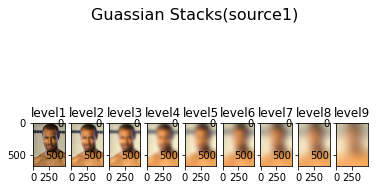

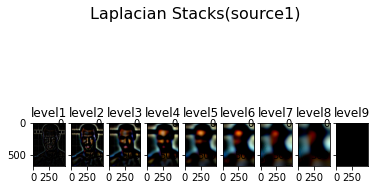

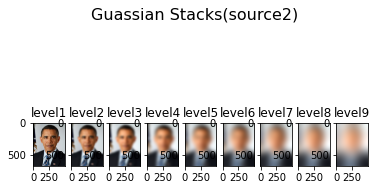

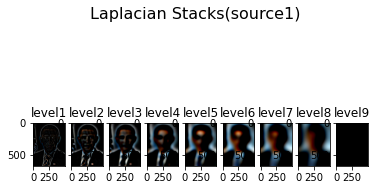

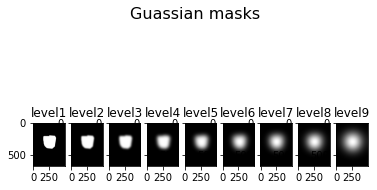

In [5]:
source1 = cv2.imread('res08_5.jpg')
source1 = cv2.cvtColor(source1, cv2.COLOR_BGR2RGB)
source1 = np.array(source1)


source2 = cv2.imread('res09_5.jpg')
source2 = cv2.cvtColor(source2, cv2.COLOR_BGR2RGB)
source2 = np.array(source2)


[row, colum, dim] = source2.shape

dim1 = (colum, row)


mask = cv2.imread('mask_q3.jpg')
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
mask = np.array(mask)


level = int(9)


original_stack_source1 = np.zeros([row, colum, dim, level])


laplacian_stack_source1 = np.zeros([row, colum, dim, level])
laplacian_stack_source2 = np.zeros([row, colum, dim, level])


mask_guassian = gussiasn_stack(mask, level)

mask_guassian = np.float64(mask_guassian/255)

guas_stack_source1 = np.float64(gussiasn_stack(
    source1, level))


guas_stack_source2 = np.float64(gussiasn_stack(source2, level))


for h in range(0, level-1):

    laplacian_stack_source1[:, :, :, h] = ((guas_stack_source1[:,
                                                               :, :, h]-guas_stack_source1[:, :, :, h+1])).astype(dtype=np.float64)

    laplacian_stack_source2[:, :, :, h] = ((guas_stack_source2[:,
                                                               :, :, h]-guas_stack_source2[:, :, :, h+1])).astype(dtype=np.float64)
    
plt.figure(1) 
plt.tight_layout(pad=6.0)
for f in range(0, 9):

    temp = guas_stack_source1[:, :, :, f] / \
        np.max(guas_stack_source1[:, :, :, f])

    plt.suptitle("Guassian Stacks(source1)", fontsize=16)
    plt.subplot(1, 9, f+1)
    plt.title(f'level{f+1}')
    plt.imshow(temp)
    
plt.figure(2)   
plt.tight_layout(pad=6.0)
for f in range(0, 9):

    temp = laplacian_stack_source1[:, :, :, f] / \
        np.max(laplacian_stack_source1[:, :, :, f])

    plt.suptitle("Laplacian Stacks(source1)", fontsize=16)
    plt.subplot(1, 9, f+1)
    plt.title(f'level{f+1}')
    plt.imshow(temp)    

plt.figure(3) 
plt.tight_layout(pad=6.0)
for f in range(0, 9):

    temp = guas_stack_source2[:, :, :, f] / \
        np.max(guas_stack_source2[:, :, :, f])

    plt.suptitle("Guassian Stacks(source2)", fontsize=16)
    plt.subplot(1, 9, f+1)
    plt.title(f'level{f+1}')
    plt.imshow(temp)
    
plt.figure(4)
plt.tight_layout(pad=6.0)
for f in range(0, 9):

    temp = laplacian_stack_source2[:, :, :, f] / \
        np.max(laplacian_stack_source2[:, :, :, f])

    plt.suptitle("Laplacian Stacks(source1)", fontsize=16)
    plt.subplot(1, 9, f+1)
    plt.title(f'level{f+1}')
    plt.imshow(temp)        
    

plt.figure(5)
plt.tight_layout(pad=6.0)
for f in range(0, 9):

    temp = mask_guassian[:, :, :, f] / \
        np.max(mask_guassian[:, :, :, f])

    plt.suptitle("Guassian masks", fontsize=16)
    plt.subplot(1, 9, f+1)
    plt.title(f'level{f+1}')
    plt.imshow(temp)         

### blending image
given images A and B, we construct the Laplacian stacks for both images A and B (LA, LB)  We compute the Gaussian stack (GR) of the mask image as well , and then compute the Laplacian stack (LS) of our resulting image.

Conceptually, each level of the computed Laplacian stack represents a band of frequencies - the equation above performs blending separately at each level. We then compute the (n+1)th image of the Gaussian stack for image A, the (n+1)th image of the Gaussian stack for image B, and sum up these two images with the total sum of the Laplacian stack (LS). This works because each level of a Laplacian stack represents the difference between the image of the same level in the Gaussian stack, and the image of the next level in the Gaussian stack. For any given image, adding its entire Laplacian stack of height n to the (n+1)th level of its Gaussian stack should return the original image. So by blending each level of LA with LB using the mask from the corresponding level of GR, we effectively blend the two images A and B at multiple bands of frequencies.
below you can see the main code and final result of blending using Laplacian Stack 



#### main code:

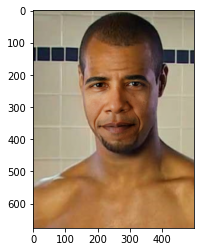

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter


def gussiasn_stack(src: np.ndarray, level: int):

    size = [0, 9, 15, 25, 35, 45, 55, 65, 85]

    guas_stack = np.zeros([row, colum, dim, level])

    dst = np.zeros([row, colum, dim])

    for i in range(0, level):

        dst1 = gaussian_filter(src[:, :, 0], sigma=int(
            size[i])).astype(dtype=np.float64)
        dst2 = gaussian_filter(src[:, :, 1], sigma=int(
            size[i])).astype(dtype=np.float64)
        dst3 = gaussian_filter(src[:, :, 2], sigma=int(
            size[i])).astype(dtype=np.float64)

        dst[:, :, 0] = dst1
        dst[:, :, 1] = dst2
        dst[:, :, 2] = dst3

        guas_stack[:, :, :, i] = dst

    return guas_stack


# ------------------------------
source1 = cv2.imread('res08_5.jpg')
source1 = cv2.cvtColor(source1, cv2.COLOR_BGR2RGB)
source1 = np.array(source1)


source2 = cv2.imread('res09_5.jpg')
source2 = cv2.cvtColor(source2, cv2.COLOR_BGR2RGB)
source2 = np.array(source2)

[row, colum, dim] = source2.shape

dim1 = (colum, row)


mask = cv2.imread('mask_q3.jpg')
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
mask = np.array(mask)


level = int(9)


original_stack_source1 = np.zeros([row, colum, dim, level])


laplacian_stack_source1 = np.zeros([row, colum, dim, level])
laplacian_stack_source2 = np.zeros([row, colum, dim, level])


mask_guassian = gussiasn_stack(mask, level)

mask_guassian = np.float64(mask_guassian/255)

guas_stack_source1 = np.float64(gussiasn_stack(
    source1, level))


guas_stack_source2 = np.float64(gussiasn_stack(source2, level))


for h in range(0, level-1):

    laplacian_stack_source1[:, :, :, h] = ((guas_stack_source1[:,
                                                               :, :, h]-guas_stack_source1[:, :, :, h+1])).astype(dtype=np.float64)

    laplacian_stack_source2[:, :, :, h] = ((guas_stack_source2[:,
                                                               :, :, h]-guas_stack_source2[:, :, :, h+1])).astype(dtype=np.float64)


laplacian_stack_source1[:, :, :, level -
                        1] = guas_stack_source1[:, :, :, level-1].astype(dtype=np.float64)

laplacian_stack_source2[:, :, :, level -
                        1] = guas_stack_source2[:, :, :, level-1].astype(dtype=np.float64)


laplacian_stack_source1 = laplacian_stack_source1 * \
    ((1-mask_guassian)).astype(dtype=np.float64)

laplacian_stack_source2 = (laplacian_stack_source2 *
                           ((mask_guassian))).astype(dtype=np.float64)


result1 = np.zeros_like(source2)

for l in range(level-1, -1, -1):
    result1 = (result1 + (laplacian_stack_source1[:, :,
                                                  :, l]+laplacian_stack_source2[:, :, :, l])).astype(dtype=np.float32)


# avoid from overflow !
result1[result1 > 255] = 255
result1[result1 < 0] = 0

plt.imsave('res10.jpg', np.uint8(result1))

plt.imshow(np.uint8(result1))
plt.show()
